# SEIR Model using `DifferentialEquations`

The implementation in this section considers proportions of susceptibles, exposed, infectious individuals in an open population, with no additional mortality associated with infection (such that the population size remains constant and R is not modelled explicitly).

$$ \dot{S} = \mu - \beta S I - \mu S $$
$$ \dot{E} = \beta S E - (\sigma + \mu) E $$
$$ \dot{I} = \sigma E - (\gamma + \mu) I $$
$$ \dot{R} = \gamma I = \mu R $$

## Packages

In [1]:
# Numerical Computation
using DifferentialEquations
# Data Visualization
using Plots
using PlotThemes

## Flow

In [7]:
function Φ!(du,u,p,t)
    S,E,I,R = u
    β,σ,γ,μ = p
    
    du[1] = μ-β*S*I-μ*S
    du[2] = β*S*I-(σ+μ)*E
    du[3] = σ*E - (γ+μ)*I
    du[4] = γ*I
end

Φ! (generic function with 1 method)

## Parameters

In [8]:
𝒫 = [520/365,1/60,1/30,774835/(65640000*365)]      # Model Parameters
ℬ = [0.8,0.1,0.1, 0.0]                             # Initial condition
𝒯 = (0.0,365.0)                                    # Time 

(0.0, 365.0)

## Solution

In [9]:
# Problem Definition
problem = ODEProblem(Φ!, ℬ, 𝒯, 𝒫)

# Problem Solution
solution = solve(problem);

## Visualization 

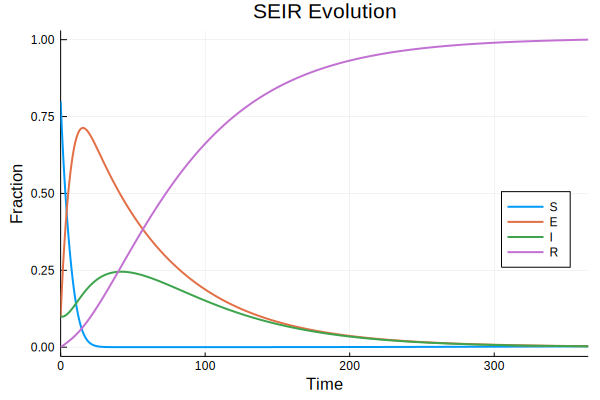

In [30]:
# Select Theme
theme(:default)

plot(solution,
     title  = "SEIR Evolution", 
     xlabel = "Time", 
     ylabel = "Fraction", 
     label=["S" "E" "I" "R"],
     lw=2,
     legend = :right)

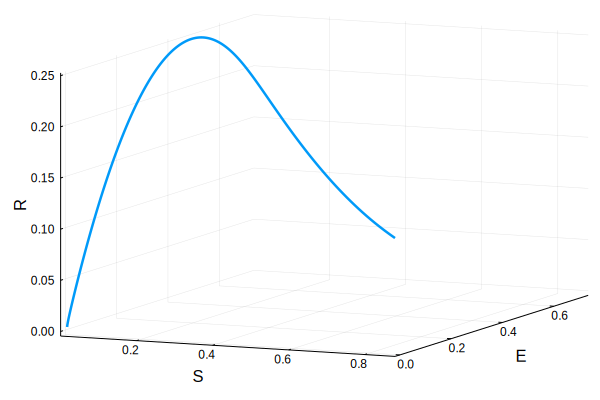

In [50]:
# Phase Diagram
plot(solution, plotdensity=1000, 
    vars=(1,2,3),
    lw=2.5,
    label = false,
    xlabel = "S",
    ylabel = "E", 
    zlabel = "R")